#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
import seaborn as sns
from warnings import filterwarnings

In [ ]:
filterwarnings('ignore')

# Loading and Observing the data

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.shape

(8012, 11)

In [ ]:
print('count before ',len(df))
print(df.isnull().sum())
df.dropna(inplace=True)
print('count after ',len(df))
#dropping null values

count before  8012
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
count after  8011


In [ ]:
cnames =  ["Price"]
# #Detect and delete outliers from data
for i in cnames:
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    df = df.drop(df[df.loc[:,i] < min].index)
    df = df.drop(df[df.loc[:,i] > max].index)

In [ ]:
print('count beofre ',len(df))
df.drop_duplicates(keep='first',inplace=True)
print('count after ',len(df))
#dropping duplicate flights


count beofre  7939
count after  7822


In [ ]:
df[['Date_of_Journey','Dep_Time','Arrival_Time','Duration']].head(2)
#SPLIT THEM UP MAYBE??

,Date_of_Journey,Dep_Time,Arrival_Time,Duration
0,12/06/2019,20:40,09:25 13 Jun,12h 45m
1,18/06/2019,18:55,22:00,3h 5m


In [ ]:
df[['Date_of_Journey','dep_time','arrival_time','Duration']].head(2)


,Date_of_Journey,dep_time,arrival_time,Duration
0,12/06/2019,Evening,Morning,12h 45m
1,18/06/2019,Evening,Night,3h 5m


In [ ]:
df.Source.value_counts() 
#label

Delhi       3296
Kolkata     2148
Banglore    1639
Mumbai       523
Chennai      289
Name: Source, dtype: int64

In [ ]:
df.Airline.value_counts()

#label

Airline A    2763
Airline B    1545
Airline C    1240
Airline D     897
Airline E     621
Airline F     359
Airline G     235
Airline H     146
Airline I      12
Airline K       3
Airline L       1
Name: Airline, dtype: int64

In [ ]:
df['Additional_Info'].value_counts()
#label

No info                         6163
In-flight meal not included     1465
No check-in baggage included     247
1 Long layover                     9
Business class                     3
No Info                            3
Change airports                    2
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
df.Total_Stops.value_counts()
#numeric
#OHE?
#label

1 stop      4235
non-stop    2620
2 stops     1006
3 stops       33
Name: Total_Stops, dtype: int64

In [ ]:
df.Route.value_counts()
#make a dictionary for route and map the values seperate the cities and OHE

DEL → BOM → COK                1784
BLR → DEL                      1162
CCU → BOM → BLR                 752
CCU → BLR                       537
BOM → HYD                       468
                               ... 
BOM → GOI → HYD                   1
BLR → HBX → BOM → BHO → DEL       1
BOM → BLR → CCU → BBI → HYD       1
BLR → VGA → VTZ → DEL             1
BOM → JDH → DEL → HYD             1
Name: Route, Length: 122, dtype: int64

In [ ]:
df.describe()
#split price in the middle and perform analyis if different features can diffretiate between the price split

,Price
count,7895.000000
mean,9021.343509
std,4636.370509
min,1759.000000
25%,5228.000000
50%,8266.000000
75%,12293.500000
max,79512.000000


#Processing the columns to a respective numeric base 

*   Splitting the Date_of_Journey into day,month,year
*   Label encoding the features wherever necessary
*   Converting the Duration column to a scalable number
*   Creating a Distance feature if proved useful




In [ ]:
#Grouping classes with very low frequency with Additional_Info
for i in range(0,len(df["Additional_Info"])):
    if df["Additional_Info"].iloc[i]== 'No check-in baggage included':
         df["Additional_Info"].iloc[i]="Others"
    elif df["Additional_Info"].iloc[i]=='1 Long layover':
         df["Additional_Info"].iloc[i]="Others"
    elif df["Additional_Info"].iloc[i]== 'Change airports':
         df["Additional_Info"].iloc[i]="Others"
    elif df["Additional_Info"].iloc[i]=='Red-eye flight':
         df["Additional_Info"].iloc[i]="Others"

for i in range(0,len(df["Airline"])):
    if df["Airline"].iloc[i]=="Airline K":
         df["Airline"].iloc[i]="Others"
    elif df["Airline"].iloc[i]=="Airline L":
         df["Airline"].iloc[i]="Others"
    elif df["Airline"].iloc[i]=="Airline I":
         df["Airline"].iloc[i]="Others"

         


df['day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
df['weekday']= pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.weekday

df.drop('Date_of_Journey',1,inplace=True)


def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return hrs
df['duration']=df['Duration'].apply(duration)
df.drop('Duration',1,inplace=True)


def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x

df['dep_time']=df['Dep_Time'].apply(deparrtime)
df['arrival_time']=df['Arrival_Time'].apply(deparrtime)
df.drop(['Dep_Time','Arrival_Time'],1,inplace=True)


# df= pd.read_csv('df.csv')
df['total_stops'] = df['Total_Stops']\
                    .replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4])
df.drop('Total_Stops',1,inplace=True)



df['additional_info'] = df['Additional_Info'].apply(lambda row: str(row))
df['additional_info'] = [x.lower() for x in list(df['additional_info'])]
df.drop('Additional_Info',1,inplace=True)

df.drop('Route',1,inplace=True)

df.Destination.replace({'New Delhi':'Delhi'}, inplace=True)




In [ ]:
df.head()

,Airline,Source,Destination,Price,day,month,weekday,duration,dep_time,arrival_time,total_stops,additional_info
0,Airline C,Delhi,Cochin,7480,12,6,2,765,Evening,Morning,1,no info
1,Airline A,Banglore,Delhi,8016,18,6,1,185,Evening,Night,0,no info
2,Airline C,Delhi,Cochin,8879,18,5,5,925,Night,Evening,1,no info
3,Airline A,Kolkata,Banglore,9663,6,5,0,735,Evening,Morning,1,in-flight meal not included
4,Airline A,Kolkata,Banglore,9663,9,5,3,330,Morning,Afternoon,1,in-flight meal not included


##Date of Journey


In [ ]:
df['day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
df['weekday']= pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.weekday

df.drop('Date_of_Journey',1,inplace=True)

In [ ]:
df[['day','month','weekday']].head(2)

,day,month,weekday
0,12,6,2
1,18,6,1


##Duration

In [ ]:
df['duration']=  df['Duration']\
                         .str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df.drop('Duration',1,inplace=True)

In [ ]:

def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
df['duration']=df['Duration'].apply(duration)
df.drop('Duration',1,inplace=True)



HOW IT WORKS

In [ ]:
# ('12h 40m'.split(' ')                 ['12h','40m']
# ('12h 40m'.split(' ')[0]              '12h'
# ('12h 40m'.split(' ')[0][:-1])        '12'
(int)('12h 40m'.split(' ')[0][:-1])*60 + (int)(['12h','40m'][1][:-1]) 

760

In [ ]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,day,month,weekday,duration
0,Airline C,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,1 stop,No info,7480,12,6,2,765


## Departure Time/Arrival Time

In [ ]:
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
df['dep_time']=df['Dep_Time'].apply(deparrtime)
df['arrival_time']=df['Arrival_Time'].apply(deparrtime)
df.drop(['Dep_Time','Arrival_Time'],1,inplace=True)

In [ ]:
df.arrival_time.value_counts()

Night        2735
Evening      2308
Afternoon    1488
Morning      1480
Name: arrival_time, dtype: int64

##Total Stops

In [ ]:
# df= pd.read_csv('df.csv')
df['total_stops'] = df['Total_Stops']\
                    .replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4])

df.drop('Total_Stops',1,inplace=True)

In [ ]:
df.total_stops.value_counts()

1    4235
0    2630
2    1112
3      34
Name: total_stops, dtype: int64

In [ ]:
df.head(1)

,Airline,Source,Destination,Route,Additional_Info,Price,day,month,weekday,duration,dep_time,arrival_time,total_stops
0,Airline C,Delhi,Cochin,DEL → MAA → COK,No info,7480,12,6,2,765,Evening,Morning,1


##OUTLIER

In [ ]:
cnames =  ["Price"]
# #Detect and delete outliers from data
for i in cnames:
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    df = df.drop(df[df.loc[:,i] < min].index)
    df = df.drop(df[df.loc[:,i] > max].index)

##Additional Info

In [ ]:
df.additional_info.value_counts()

no info                        6191
in-flight meal not included    1492
others                          256
Name: additional_info, dtype: int64

###Since this column has a big majority belonging to the same class, the model wont learn much from it, but still experimenting is necessary for any task. So I will try both ways.

In [ ]:
df['additional_info'] = df['Additional_Info'].apply(lambda row: str(row))
df['additional_info'] = [x.lower() for x in list(df['additional_info'])]
df.drop('Additional_Info',1,inplace=True)

In [ ]:
df.drop('Route',1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Price,day,month,weekday,duration,dep_time,arrival_time,total_stops,additional_info
0,Airline C,Delhi,Cochin,7480,12,6,2,765,Evening,Morning,1,no info
1,Airline A,Banglore,Delhi,8016,18,6,1,185,Evening,Night,0,no info
2,Airline C,Delhi,Cochin,8879,18,5,5,925,Night,Evening,1,no info
3,Airline A,Kolkata,Banglore,9663,6,5,0,735,Evening,Morning,1,in-flight meal not included
4,Airline A,Kolkata,Banglore,9663,9,5,3,330,Morning,Afternoon,1,in-flight meal not included


In [ ]:
df.to_csv('df.csv')
#for future

#Visualising Key features

In [ ]:
df = pd.read_csv('df.csv')

In [ ]:
time= df.copy()

In [ ]:
# df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
time = df.groupby(pd.Grouper(key='Date_of_Journey',freq='M')).agg({'Price':'mean'}).dropna()

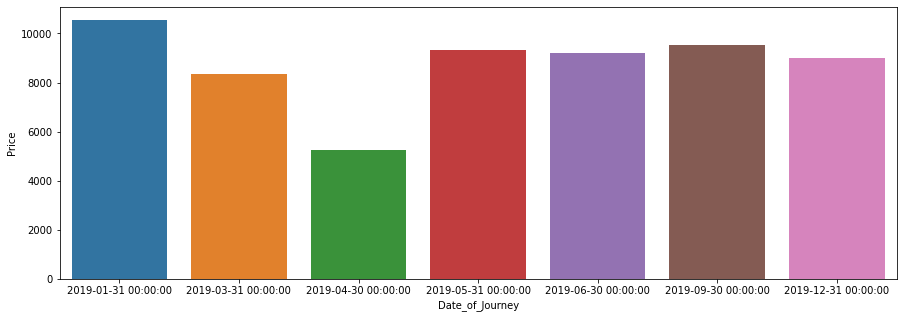

In [ ]:
plt.figure(figsize=(15,5))
vis1 = sns.barplot(x=time.index,y=time['Price'])

In [ ]:
time['month']= time['month']\
          .replace({1:'January',3:'March',4:'April',5:'May',6:'June',9:'September',12:'December'})

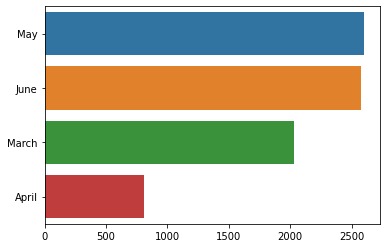

In [ ]:
val= list(dict(time.month.value_counts()).values())
key= list(dict(time.month.value_counts()).keys()) 
sns.barplot(x=val,y=key)


In [ ]:
time.groupby(['month']).agg({'Price':np.mean,'month':np.count_nonzero})

,Price,month
month,,
April,5252.538217,314
December,9020.275580,733
January,10548.077500,800
June,9221.708641,1898
March,8348.433313,1627
May,9321.172304,1567
September,9520.490672,1072


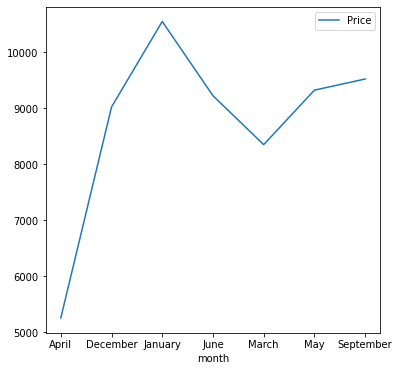

In [ ]:
monthly_avg = time.groupby(['month']).agg({'Price':np.mean}).reset_index()
monthly_avg.plot(x='month',y='Price',figsize=(6,6))

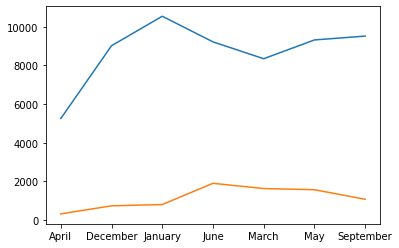

In [ ]:
monthly_avg = pd.DataFrame(time.groupby(['month']).agg({'Price':np.mean,'month':np.count_nonzero}))
plt.plot(monthly_avg,scaley=True)

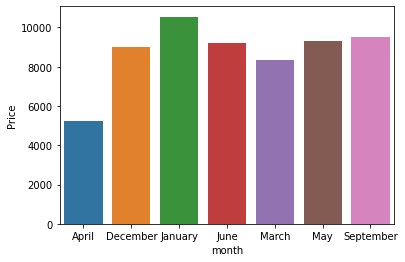

In [ ]:
sns.barplot(x=monthly_avg.index, y = monthly_avg['Price'])

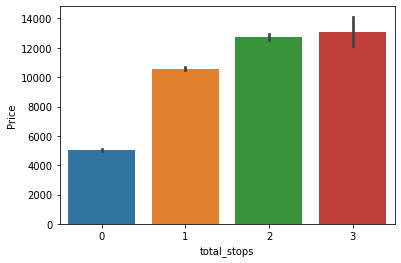

In [ ]:
sns.barplot(x=time['total_stops'],y=time['Price'])

# Price Split to check if theres a Visual difference in higher and lower prices 

###before outlier

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
time['pricesplit'] = 0
for i in range(len(time)):
  if time.Price.iloc[i]>=9000:
    time['pricesplit'].iloc[i] = 1 
  else:
    time['pricesplit'].iloc[i] = 0


In [ ]:
time.pricesplit.value_counts()

0    4379
1    3632
Name: pricesplit, dtype: int64

In [ ]:
time.head(1)

,Unnamed: 0,Airline,Source,Destination,Price,day,month,weekday,duration,dep_time,arrival_time,total_stops,additional_info,pricesplit
0,0,Airline C,Delhi,Cochin,7480,6,December,4,765,Evening,Morning,1,no info,0


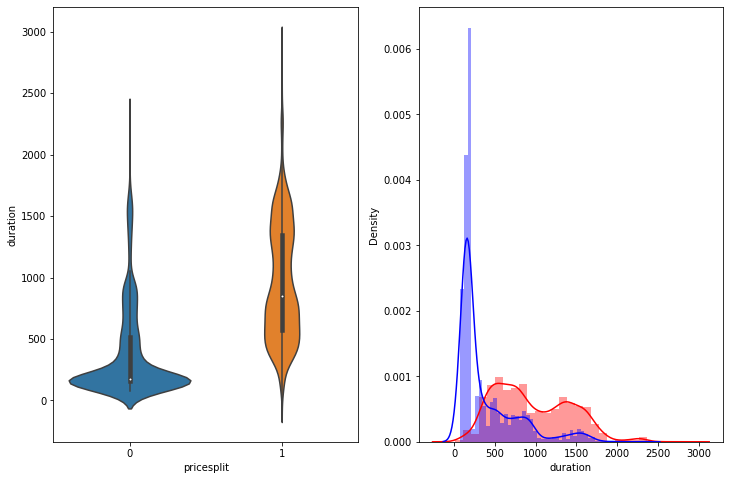

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'pricesplit', y = 'duration', data = time[0:])

plt.subplot(1,2,2)
sns.distplot(time[time['pricesplit'] == 1]['duration'][0:] , label = "1", color = 'red')
sns.distplot(time[time['pricesplit'] == 0]['duration'][0:] , label = "0" , color = 'blue' )
plt.show()

###after outlier removal

In [ ]:
timeo = time.copy()

In [ ]:
# timeo.drop(timeo.Price.idxmax(),inplace=True)
# timeo[['duration']].sort_values(by='duration')[-20:]

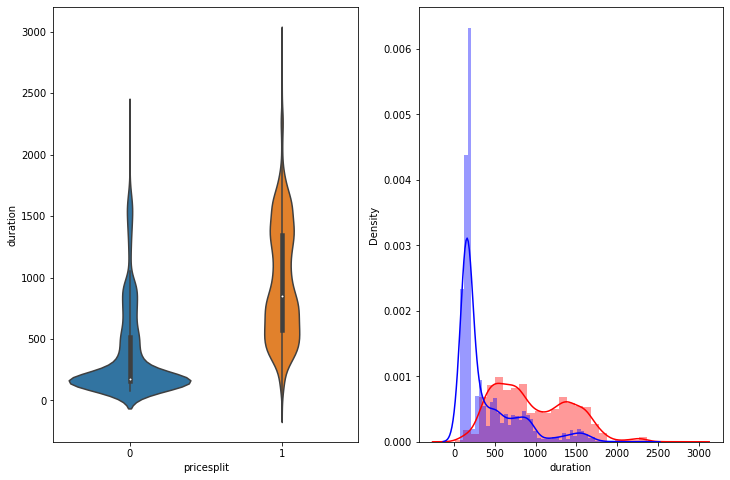

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'pricesplit', y = 'duration', data = timeo[0:])

plt.subplot(1,2,2)
sns.distplot(timeo[timeo['pricesplit'] == 1]['duration'][0:] , label = "1", color = 'red')
sns.distplot(timeo[timeo['pricesplit'] == 0]['duration'][0:] , label = "0" , color = 'blue' )
plt.show()

# FURTHER

In [ ]:
#fixing columns
df=pd.read_csv('df.csv')

In [ ]:
durr = df[(df['Source'] == 'Banglore') & (df['Destination'] == 'New Delhi')][['duration','Airline','Price']]
# df.drop(df['Airline'] = .index)

In [ ]:
durr.groupby(['Airline']).agg({'duration':np.mean,'Price':np.mean})

,duration,Price
Airline,,
Airline A,823.338762,15094.729642
Airline B,200.960000,7291.008000
Airline C,1023.493590,11035.160256
Airline E,222.666667,6282.766667
Airline F,302.875000,9045.225000
Airline G,167.857143,6096.785714
Airline H,185.882353,7549.000000
Airline J,330.000000,62844.250000
Airline K,155.000000,11793.000000


In [ ]:
df[df['Airline'] == 'Airline K'].index

Int64Index([1307, 4484, 7975], dtype='int64')

In [ ]:
df.drop(df[df['Airline'] == 'Airline L'].index,0,inplace=True)

In [ ]:
for i in range(0,len(df["Airline"])):
    if df["Airline"].iloc[i]=="Airline K":
         df["Airline"].iloc[i]="Others"
    elif df["Airline"].iloc[i]=="Airline L":
         df["Airline"].iloc[i]="Others"
    elif df["Airline"].iloc[i]=="Airline I":
         df["Airline"].iloc[i]="Others"

In [ ]:
df.Airline.value_counts()

Airline A    2837
Airline B    1550
Airline C    1274
Airline D     897
Airline E     624
Airline F     360
Airline G     235
Airline H     146
Others         16
Name: Airline, dtype: int64

In [ ]:
df.Source.value_counts()

Delhi       3295
Kolkata     2148
Banglore    1639
Mumbai       522
Chennai      289
Name: Source, dtype: int64

In [ ]:
df.Destination.replace({'New Delhi':'Delhi'}, inplace=True)
print(df.Destination.value_counts())

Cochin       3280
Banglore     2147
Delhi         956
New Delhi     630
Hyderabad     520
Kolkata       289
Name: Destination, dtype: int64


In [ ]:
df['pricesplit'] = 0
for i in range(len(df)):
  if df.Price.iloc[i]>=9000:
    df['pricesplit'].iloc[i] = 1 
  else:
    df['pricesplit'].iloc[i] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df['distance'] = 903*(df['duration']/60)

#MODEL BUILDING

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

from math import sqrt

In [ ]:
df.head()

,Airline,Source,Destination,Price,day,month,weekday,duration,dep_time,arrival_time,total_stops,additional_info,distance
0,Airline C,Delhi,Cochin,7480,12,6,2,765,Evening,Morning,1,no info,11513.25
1,Airline A,Banglore,Delhi,8016,18,6,1,185,Evening,Night,0,no info,2784.25
2,Airline C,Delhi,Cochin,8879,18,5,5,925,Night,Evening,1,no info,13921.25
3,Airline A,Kolkata,Banglore,9663,6,5,0,735,Evening,Morning,1,in-flight meal not included,11061.75
4,Airline A,Kolkata,Banglore,9663,9,5,3,330,Morning,Afternoon,1,in-flight meal not included,4966.50


In [ ]:
cols= list(df.select_dtypes(exclude='number'))
for i in range(len(cols)):
  le = LabelEncoder()
  df[cols[i]] = le.fit_transform(df[cols[i]])

  # train_cat[cols[i]] = le.transform(train_cat[cols[i]])
  # test_cat[cols[i]]  = le.transform(test_cat[cols[i]])

In [ ]:
mm = MinMaxScaler()

df.distance = mm.fit_transform(df[['distance']])

In [ ]:
df.head()

,Airline,Source,Destination,Price,day,month,weekday,duration,dep_time,arrival_time,total_stops,additional_info,distance
0,2,2,1,7480,12,6,2,765,1,2,1,1,0.247756
1,0,0,2,8016,18,6,1,185,1,3,0,1,0.039497
2,2,2,1,8879,18,5,5,925,3,1,1,1,0.305206
3,0,3,0,9663,6,5,0,735,1,2,1,0,0.236984
4,0,3,0,9663,9,5,3,330,2,0,1,0,0.091562


In [ ]:
df["duration"]= (df["duration"] - df["duration"].mean())/df["duration"].std()

In [ ]:
df.head()

,Airline,Source,Destination,Price,day,month,weekday,duration,dep_time,arrival_time,total_stops,additional_info,distance
0,2,2,1,7480,12,6,2,0.267587,1,2,1,1,0.247756
1,0,0,2,8016,18,6,1,-0.886874,1,3,0,1,0.039497
2,2,2,1,8879,18,5,5,0.586059,3,1,1,1,0.305206
3,0,3,0,9663,6,5,0,0.207874,1,2,1,0,0.236984
4,0,3,0,9663,9,5,3,-0.598259,2,0,1,0,0.091562


In [ ]:
# df
# num = df.select_dtypes(include='number')
# cat = df.select_dtypes(exclude='number')
X= df.drop('Price',1)
y=df.Price


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=df['Airline'],random_state= 42)

In [ ]:
train_cat = X_train.select_dtypes(exclude= 'number')
train_num = X_train.select_dtypes(include= 'number')

test_cat = X_test.select_dtypes(exclude= 'number')
test_num = X_test.select_dtypes(include= 'number')

In [ ]:
train_cat.additional_info.value_counts()

In [ ]:
test_cat.additional_info.value_counts()

no info                         1222
in-flight meal not included      304
no check-in baggage included      49
1 long layover                     2
red-eye flight                     1
business class                     1
Name: additional_info, dtype: int64

###Label Encoding

In [ ]:
cols= list(train_cat)
for i in range(len(cols)):
  le = LabelEncoder()
  le.fit(df[cols[i]])
  train_cat[cols[i]] = le.transform(train_cat[cols[i]])
  test_cat[cols[i]]  = le.transform(test_cat[cols[i]])
  # real_test_cat[cols[i]] = le.transform(real_test_cat[cols[i]])

In [ ]:
# def labelen(col,col2):

#   le = LabelEncoder()

#   col = le.fit_transform(col)
#   col2 = le.transform(col2)
#   testc = le.transform(testc)
#   return col,col2


In [ ]:
# train_cat['Source'], test_cat['Source'], test['Source'] = labelen(train_cat['Source'],test_cat['Source'],test['Source'])
# train_cat['Destination'], test_cat['Destination'],test['Destination'] = labelen(train_cat['Destination'],test_cat['Destination'],test['Destination'])
# train_cat['dep_time'], test_cat['dep_time'],test['dep_time'] = labelen(train_cat['dep_time'],test_cat['dep_time'],test['dep_time'])
# train_cat['arrival_time'], test_cat['arrival_time'],test['arrival_time'] = labelen(train_cat['arrival_time'],test_cat['arrival_time'],test['arrival_time'])
# train_cat['additional_info'], test_cat['additional_info'],test['additional_info'] = labelen(train_cat['additional_info'],test_cat['additional_info'],test['additional_info'])

In [ ]:
train_cat.head(1)

,Airline,Source,Destination,dep_time,arrival_time,additional_info
5169,0,0,2,2,2,5


In [ ]:
# train_num.drop('Unnamed: 0',1,inplace= True)

In [ ]:
train_num.head(1)

,day,month,weekday,duration,total_stops,distance
5169,27,5,0,180,0,2709.0


###min max

In [ ]:
mm = MinMaxScaler()

train_num['distance'] = mm.fit_transform(train_num[['distance']])
test_num['distance'] = mm.transform(test_num[['distance']])
real_test_num['distance'] = mm.transform(real_test_num[['distance']])

In [ ]:
print(train_num.shape,train_cat.shape)
print(test_num.shape, test_cat.shape)

(6314, 7) (6314, 6)
(1579, 7) (1579, 6)


In [ ]:
traindata = pd.concat([train_cat,train_num],1)
testdata = pd.concat([test_cat,test_num],1)

In [ ]:
print(traindata.shape)
print(y_train.shape)
print(testdata.shape)
print(y_test.shape)

(6314, 12)
(6314,)
(1579, 12)
(1579,)


In [ ]:
traindata

,Airline,Source,Destination,dep_time,arrival_time,additional_info,day,month,weekday,duration,total_stops,pricesplit,distance
4681,0,2,1,1,3,5,24,6,0,505,2,1,0.175131
4053,6,2,1,1,2,7,1,6,5,865,1,1,0.301226
3079,0,2,1,0,1,5,27,5,0,450,1,1,0.155867
6286,2,3,0,2,3,7,15,5,2,805,2,1,0.280210
7787,0,3,0,1,3,5,24,3,6,1660,1,1,0.579685
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,0,0,2,1,2,7,6,3,2,965,1,1,0.336252
4171,7,0,2,1,3,7,12,4,4,165,0,0,0.056042
6997,0,4,3,2,1,7,12,3,1,405,1,1,0.140105
3193,5,3,0,1,1,7,1,5,2,1440,1,0,0.502627


In [ ]:
%%time

rf = RandomForestRegressor(n_estimators=1100,max_depth=50)
rf.fit(X_train, y_train)
preditction_rf = rf.predict(X_test)
print('r2score ',r2_score(y_pred=preditction_rf,y_true= y_test))
print('mse ',sqrt(mse(y_test,preditction_rf)))

r2score  0.8906523239287676
mse  1332.873027802262
CPU times: user 18.3 s, sys: 98.5 ms, total: 18.4 s
Wall time: 18.5 s


In [ ]:
-np.sqrt(np.square(np.log10(preditction_rf +1) - np.log10(y_test +1)).mean())

-0.06160022557784544

<BarContainer object of 12 artists>

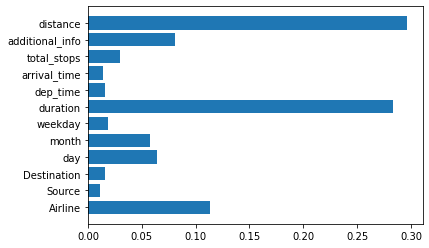

In [ ]:
pd.DataFrame(data = {'imp':rf.feature_importances_,'col':list(X_train)}).sort_values(by='imp')
plt.barh(list(X_train),rf.feature_importances_)

<BarContainer object of 12 artists>

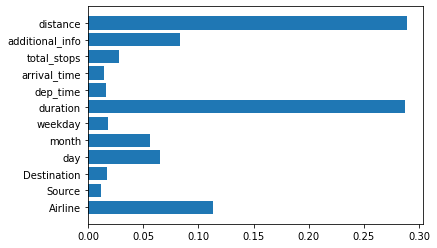

In [ ]:
plt.barh(list(X),random_regressor.best_estimator_.feature_importances_)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

Random forest

In [ ]:
%%time
tuned_params = {'n_estimators': [500,1000], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4],'max_depth': [5,10,50,100]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, cv = 5, n_jobs = -1,scoring='neg_mean_squared_error')
random_regressor.fit(X_train, y_train)


CPU times: user 16.5 s, sys: 282 ms, total: 16.8 s
Wall time: 11min


In [ ]:
new_model = random_regressor.best_estimator_

In [ ]:
random_regressor.best_params_

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [ ]:
random_regressor.best_estimator_.feature_importances_

In [ ]:

# y_train_pred = new_model.predict(traindata)
y_test_pred = new_model.predict(X_test)

print("Test Results for Random Forest Regressor model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_pred=y_test_pred,y_true= y_test)))
# print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_pred=y_test_pred, y_true=y_test))

Test Results for Random Forest Regressor model:
--------------------------------------------------
Root mean squared error:  1294.508852973959
R-squared:  0.8968564563714297


In [ ]:
-np.sqrt(np.square(np.log10(y_test_pred +1) - np.log10(y_test +1)).mean())


-0.06015629112823139

XGB regressor


In [ ]:
%%time
tuned_params = {'max_depth': [1,5,8,10,50,100,150], 'learning_rate': [0.01, 0.1], 'n_estimators': [500,1000,1100,1200]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

[13:11:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 13.8 s, sys: 171 ms, total: 13.9 s
Wall time: 21min 23s


In [ ]:
model.best_params_

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1100}

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_true=y_test, y_pred=y_test_pred)))
# print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_true=y_test,y_pred= y_test_pred))


Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1198.2213463255023
R-squared:  0.9116297460739681


In [ ]:
-np.sqrt(np.square(np.log10(y_test_pred +1) - np.log10(y_test +1)).mean())


-0.056014717021475494

In [ ]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_squared_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)


y_train_pred =lasso_regressor.predict(traindata) ##Predict train result
y_test_pred =lasso_regressor.predict(testdata) ##Predict test result


print("Test Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_true= y_test, y_pred= y_test_pred)))
# print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_true = y_test,y_pred = y_test_pred))



Test Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  3239.806707392765
R-squared:  0.4744580233786089


In [ ]:
-np.sqrt(np.square(np.log10(y_test_pred +1) - np.log10(y_test +1)).mean())


-0.14503715227614475

#TEST FILE PROCESSING

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test.shape

(2671, 10)

In [ ]:
test.head().drop('Route',1)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline B,27-03-2019,Delhi,Cochin,04:55,16:10,11h 15m,1 stop,No info
1,Airline E,27-05-2019,Kolkata,Banglore,22:20,28-05-2020 00:40,2h 20m,non-stop,No info
2,Airline C,06-06-2019,Kolkata,Banglore,05:50,20:25,14h 35m,2 stops,No info
3,Airline A,06-03-2019,Banglore,New Delhi,09:45,14:25,4h 40m,1 stop,No info
4,Airline B,15-06-2019,Delhi,Cochin,16:00,16-06-2020 01:30,9h 30m,1 stop,No info


In [ ]:
# print('count before ',len(test))
# print(test.isnull().sum())
# test.dropna(inplace=True)
# print('count after ',len(test))
# #dropping null values

In [ ]:
# print('count beofre ',len(df))
# df.drop_duplicates(keep='first').shape
# print('count after ',len(df))
#dropping duplicate flights
# df.shape

In [ ]:
#DATE OF JOURNEY
for i in range(0,len(test["Additional_Info"])):
    if test["Additional_Info"].iloc[i]== 'No check-in baggage included':
         test["Additional_Info"].iloc[i]="Others"
    elif test["Additional_Info"].iloc[i]=='1 Long layover':
         test["Additional_Info"].iloc[i]="Others"
    elif test["Additional_Info"].iloc[i]== 'Change airports':
         test["Additional_Info"].iloc[i]="Others"
    elif test["Additional_Info"].iloc[i]=='Red-eye flight':
         test["Additional_Info"].iloc[i]="Others"

for i in range(0,len(df["Airline"])):
    if df["Airline"].iloc[i]=="Airline K":
         df["Airline"].iloc[i]="Others"
    elif df["Airline"].iloc[i]=="Airline L":
         df["Airline"].iloc[i]="Others"
    elif df["Airline"].iloc[i]=="Airline I":
         df["Airline"].iloc[i]="Others"


test['day'] = pd.to_datetime(test.Date_of_Journey, format='%d-%m-%Y').dt.day
test['month'] = pd.to_datetime(test.Date_of_Journey, format='%d-%m-%Y').dt.month
test['weekday']= pd.to_datetime(test.Date_of_Journey, format='%d-%m-%Y').dt.weekday
test.drop('Date_of_Journey',1,inplace=True)


#DURATION

def duration(test1):
    test1 = test1.strip()
    total=test1.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test1=str(hrs)
    return hrs

test['duration']=test['Duration'].apply(duration)
test.drop('Duration',1,inplace=True)



#TOTAL STOPS



#ROUTE
test.drop('Route',1,inplace=True)

In [ ]:
test['new_Arrival_Time'] = pd.to_datetime(test.Arrival_Time).dt.time

In [ ]:
def deparrtime(x):
    x=str(x)
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
# test['dep_time']=test['Dep_Time'].apply(deparrtime)
test['arrival_time']=test['new_Arrival_Time'].apply(deparrtime)

In [ ]:
test.drop(['Dep_Time','Arrival_Time','new_Arrival_Time'],1,inplace=True)

In [ ]:
test['total_stops'] = test['Total_Stops']\
                    .replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4])
test.drop('Total_Stops',1,inplace=True)


#ADDITIONAL INFO

         
test['additional_info'] = test['Additional_Info'].apply(lambda row: str(row))
test['additional_info'] = [x.lower() for x in list(test['additional_info'])]
test.drop('Additional_Info',1,inplace=True)

In [ ]:
test.Destination.replace({'New Delhi':'Delhi'}, inplace=True)
print(test.Destination.value_counts())

Cochin       1139
Banglore      719
Delhi         547
Hyderabad     174
Kolkata        92
Name: Destination, dtype: int64


In [ ]:
test['distance'] = 903*(test['duration']/60)
# test['distance'] = (test['distance']/8)*5

In [ ]:
test["duration"]= (test["duration"] - test["duration"].mean())/test["duration"].std()


In [ ]:
mm = MinMaxScaler()
test['distance'] = mm.fit_transform(test[['distance']])
test['duration'] = 


In [ ]:
colsname = list(test.select_dtypes(exclude='number'))
for i in range(len(list(colsname))):
  le=LabelEncoder()
  test[colsname[i]] = le.fit_transform(test[colsname[i]])


In [ ]:
X.head()

,Airline,Source,Destination,day,month,weekday,duration,dep_time,arrival_time,total_stops,additional_info,distance
0,2,2,1,12,6,2,0.267587,1,2,1,1,0.247756
1,0,0,2,18,6,1,-0.886874,1,3,0,1,0.039497
2,2,2,1,18,5,5,0.586059,3,1,1,1,0.305206
3,0,3,0,6,5,0,0.207874,1,2,1,0,0.236984
4,0,3,0,9,5,3,-0.598259,2,0,1,0,0.091562


In [ ]:
test.head()

,Airline,Source,Destination,day,month,weekday,duration,dep_time,arrival_time,total_stops,additional_info,distance
0,1,2,1,27,3,2,0.048142,3,1,1,2,0.218579
1,4,3,0,27,5,0,-0.996485,3,3,0,2,0.023679
2,2,3,0,6,6,3,0.438656,2,1,2,2,0.291439
3,0,0,2,6,3,2,-0.723125,2,0,1,2,0.074681
4,1,2,1,15,6,5,-0.156878,1,3,1,2,0.180328


In [ ]:
real_test_cat = test.select_dtypes(exclude='number')
real_test_num = test.select_dtypes(include='number')

In [ ]:
full_test_data = pd.concat([real_test_cat,real_test_num],1)

In [ ]:
print(full_test_data.shape)
full_test_data.head(1)

(2671, 12)


,Airline,Source,Destination,additional_info,arrival_time,dep_time,day,month,weekday,duration,total_stops,distance
0,1,2,1,7,1,3,27,3,2,675,1,0.146016


In [ ]:
final_model = RandomForestRegressor(max_depth = 50, min_samples_split=5, min_samples_leaf=1, n_estimators=1000)
final_model.fit(X,y)
# {'max_depth': 50,
#  'min_samples_leaf': 1,
#  'min_samples_split': 5,
#  'n_estimators': 1000}

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
final_model = XGBRegressor(max_depth=10, n_estimators=1100, learning_rate=0.01)
final_model.fit(X,y)
# {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1100}

[13:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
price = final_model.predict(test)
price=price.astype(np.int64)
sub = pd.DataFrame({'Price':price})


In [ ]:
sub.to_csv('upload12.csv',index=False)